# 6.3.3 Install the libraries folium and JSON via Anaconda
### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# Prompt matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S.
country_geo_all = r'/Users/samantha/Documents/Unit 6/us-states.json'

In [4]:
# Import the COVID dataframe for 2020-2023 for all ages
covid_all = pd.read_csv(r'/Users/samantha/Documents/COVID Analysis/02 Data/Prepared Data/5-15_c19_totals_states_2020-2023_all_ages.csv', index_col = False)

In [8]:
covid_all.head()

,group,year,month,hhs_region,state,place_of_death,age_group,deaths_c19,deaths_flu,deaths_pna,deaths_c19_and_pna,deaths_c19_pna_or_flu,deaths_total
0,By Month,2020,1,4,Alabama,Total - All Places of Death,All Ages,5,35,282,0,318,4729
1,By Month,2020,1,4,Alabama,Total - All Places of Death,0-17 years,0,5,5,0,5,71
2,By Month,2020,1,4,Alabama,Total - All Places of Death,18-29 years,0,0,0,0,0,72
3,By Month,2020,1,4,Alabama,Total - All Places of Death,30-39 years,0,5,5,0,5,103
4,By Month,2020,1,4,Alabama,Total - All Places of Death,40-49 years,0,5,10,0,13,199


# 6.3.5 Wrangle your project data to meet the needs of your analysis.
# 6.3.6 Clean your data set — watch for missing and extreme values.
### This is for COVID 19 Deaths for 2020-2023 all ages

In [ ]:
# Check for missing values

In [9]:
covid_all.isnull().sum()

group                    0
year                     0
month                    0
hhs_region               0
state                    0
place_of_death           0
age_group                0
deaths_c19               0
deaths_flu               0
deaths_pna               0
deaths_c19_and_pna       0
deaths_c19_pna_or_flu    0
deaths_total             0
dtype: int64

In [ ]:
# no missing values

In [10]:
dups = covid_all.duplicated()

In [11]:
# no duplicates
dups.shape

(19080,)

In [ ]:
# check for extreme values

<AxesSubplot:xlabel='deaths_c19', ylabel='Count'>

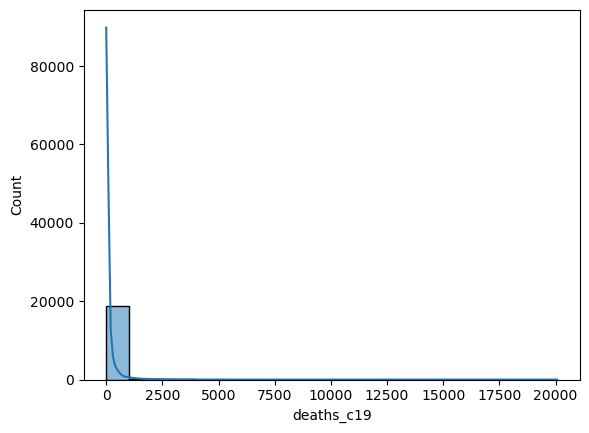

In [14]:
sns.histplot(covid_all['deaths_c19'], bins=20, kde = True) # extreme values for COVID 19 Deaths 2020-2023 all ages

In [15]:
# Check how many extreme values

covid_all[covid_all['deaths_c19'] >20000]

,group,year,month,hhs_region,state,place_of_death,age_group,deaths_c19,deaths_flu,deaths_pna,deaths_c19_and_pna,deaths_c19_pna_or_flu,deaths_total
1548,By Month,2021,1,9,California,Total - All Places of Death,All Ages,20065,16,13802,12191,21687,48148


In [ ]:
# 1 extreme value
# I will leave this as part of the dataframe since it is close to 20000

In [17]:
# Create a dataframe for COVID 19 Deaths 2020-2023 all ages
data_to_plot = covid_all[['state','deaths_c19']]
data_to_plot.head()

,state,deaths_c19
0,Alabama,5
1,Alabama,0
2,Alabama,0
3,Alabama,0
4,Alabama,0


In [19]:
# Setup a folium map at a high-level zoom
map_all = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo_all, 
    data = data_to_plot,
    columns = ['state', 'deaths_c19'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map_all)
folium.LayerControl().add_to(map_all)

map_all

### Above is a choropleth map for COVID 19 Deaths between 2020-2023 for all ages. 

### Now I will complete the same steps above for COVID 19 Deaths between 2020-2023 for ages 65+

In [20]:
# Import ".json" file for the U.S.
country_geo_65 = r'/Users/samantha/Documents/Unit 6/us-states.json'

In [21]:
# Import the COVID dataframe for 2020-2023 for ages 65+
covid_65 = pd.read_csv(r'/Users/samantha/Documents/COVID Analysis/02 Data/Prepared Data/5-15_c19_totals_states_2020-2023_65+.csv', index_col = False)

In [22]:
covid_65.head()

,group,year,month,hhs_region,state,place_of_death,age_group,deaths_c19,deaths_flu,deaths_pna,deaths_c19_and_pna,deaths_c19_pna_or_flu,deaths_total
0,By Month,2020,1,4,Alabama,Total - All Places of Death,65-74 years,0,11,64,0,75,1034
1,By Month,2020,1,4,Alabama,Total - All Places of Death,75-84 years,0,5,86,0,91,1178
2,By Month,2020,1,4,Alabama,Total - All Places of Death,85 years and over,0,5,64,0,65,1177
3,By Month,2020,2,4,Alabama,Total - All Places of Death,65-74 years,0,12,60,0,72,968
4,By Month,2020,2,4,Alabama,Total - All Places of Death,75-84 years,0,5,76,0,79,1159


# 6.3.5 Wrangle your project data to meet the needs of your analysis.
# 6.3.6 Clean your data set — watch for missing and extreme values.
### This is for COVID 19 Deaths for 2020-2023 ages 65+

In [23]:
covid_65.isnull().sum()

group                    0
year                     0
month                    0
hhs_region               0
state                    0
place_of_death           0
age_group                0
deaths_c19               0
deaths_flu               0
deaths_pna               0
deaths_c19_and_pna       0
deaths_c19_pna_or_flu    0
deaths_total             0
dtype: int64

In [ ]:
# no missing values

In [24]:
dups_65 = covid_65.duplicated()

In [26]:
dups_65.shape

(6360,)

In [ ]:
# no duplicates

In [ ]:
# check for extreme values

<AxesSubplot:xlabel='deaths_c19', ylabel='Count'>

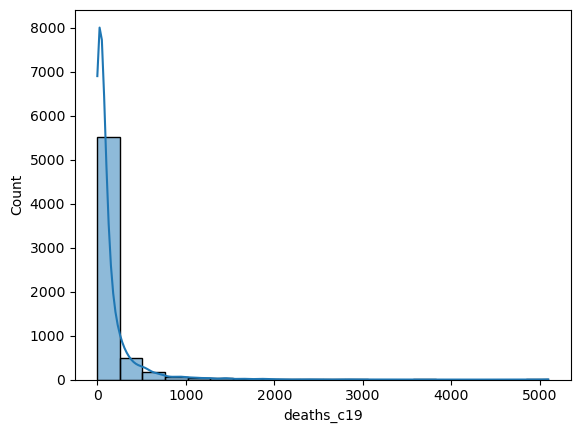

In [27]:
sns.histplot(covid_65['deaths_c19'], bins=20, kde = True) # extreme values for COVID 19 Deaths 2020-2023 all ages

In [29]:
# Check how many extreme values

covid_65[covid_65['deaths_c19'] >5000]

,group,year,month,hhs_region,state,place_of_death,age_group,deaths_c19,deaths_flu,deaths_pna,deaths_c19_and_pna,deaths_c19_pna_or_flu,deaths_total
517,By Month,2021,1,9,California,Total - All Places of Death,75-84 years,5094,5,3634,3216,5517,11420
518,By Month,2021,1,9,California,Total - All Places of Death,85 years and over,5084,5,3164,2680,5568,14242


In [ ]:
# 2 extreme values
# I will keep these with the datafram since they are very close to 5000

In [30]:
# Create a dataframe for COVID 19 Deaths 2020-2023 ages 65+
data_to_plot = covid_65[['state','deaths_c19']]
data_to_plot.head()

,state,deaths_c19
0,Alabama,0
1,Alabama,0
2,Alabama,0
3,Alabama,0
4,Alabama,0


In [31]:
# Setup a folium map at a high-level zoom
map_65 = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo_65, 
    data = data_to_plot,
    columns = ['state', 'deaths_c19'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map_65)
folium.LayerControl().add_to(map_65)

map_65

### Above is a choropleth map for COVID 19 Deaths between 2020-2023 for ages 65+. 

# 6.3.8 Discuss the results and what they mean in a markdown section.
### Does the analysis answer any of your existing research questions?
### Does the analysis lead you to any new research questions?

I wanted to see if there was any difference between COVID 19 Deaths for all ages vs 65+. At this point, the choropleth maps don't appear to be showing any differences. This might be accurate, or I may have missed a step when creating both maps. 

A new research question for me is if death counts vary year to year. That is, are some years notieably higher than others? 

# 6.3.9 Submit your Jupyter notebook and your html map output file for your tutor to review.

In [32]:
map_all.save('plot_data.html')

In [33]:
map_65.save('plot_data.html')